In [1]:
# Launch this if you work on new macbook
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Downolad imdb data from keras.datasets (save only 10 000 words)

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
# To get the training and test kits, we download and split the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Data preparing

In [4]:
# Binary encoding of integer sequences
import numpy as np

def vectorize_sequences(sequneces, dimension=10000):
    # Creating array with shape (len(sequences), dimension)
    results = np.zeros((len(sequneces), dimension))
    for i, sequnece in enumerate(sequneces):
        # Writing a 1 in an element with a specified index
        results[i, sequnece] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [5]:
# Check how the samples looks like
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model definition

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from numpy.random import seed
seed(92)

In [13]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Create validation data
X_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Fit the model

In [15]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.5844 - accuracy: 0.7423 - val_loss: 0.4477 - val_accuracy: 0.8474
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.3381 - accuracy: 0.8918 - val_loss: 0.3097 - val_accuracy: 0.8826
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2235 - accuracy: 0.9286 - val_loss: 0.2784 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1655 - accuracy: 0.9482 - val_loss: 0.2787 - val_accuracy: 0.8886
Epoch 5/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1263 - accuracy: 0.9632 - val_loss: 0.2887 - val_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.0959 - accuracy: 0.9757 - val_loss: 0.3071 - val_accuracy: 0.8834
Epoch 7/20
15000/15000 [==============================] - 1s 83us/s

### Creating loss charts at the training and verification stages

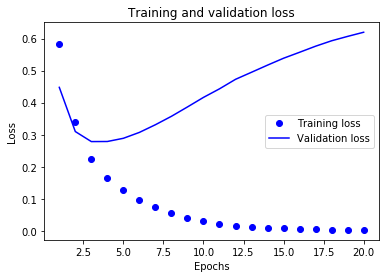

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

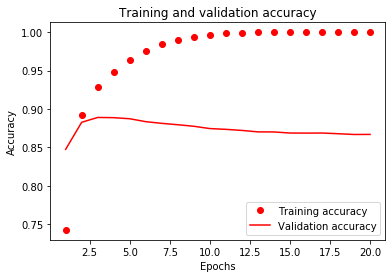

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()